## Light GBM and XG Boost

In [ ]:
# Import Libraries

In [3]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 292.6 kB/s eta 0:07:07
   ---------------------------------------- 0.1/124.9 MB 469.7 kB/s eta 0:04:26
   ---------------------------------------- 0.1/124.9 MB 469.7 kB/s eta 0:04:26
   ---------------------------------------- 0.2/124.9 MB 590.8 kB/s eta 0:03:32
   ---------------------------------------- 0.2/124.9 MB 655.6 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 603.9 kB/s eta 0:03:27
   ---------------------------------------- 0.2/124.9 MB 603.9 kB/s eta 0:03:27
   ---------------------------------------- 0.4/124.9 MB 715

In [59]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.4 MB 393.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 328.2 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 328.2 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 245.8 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.4 MB 245.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 218.5 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.4 MB 218.5 kB/s eta 0:00:07
   --- ------------------------------------ 0.1/1.4 MB 218.3 kB/s eta 0:00:07
   -

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Exploratory Data Analysis (EDA):

In [ ]:
# Load the traning data

In [2]:
df_train=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# load the testing data

In [3]:
df_test=pd.read_csv(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#Dropping uneccesary columns or else it will be very complex data.

In [10]:
df_train.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [11]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [13]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
#Find duplicate value in training data

In [14]:
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [15]:
df_train.duplicated().sum()

111

In [16]:
df_train.shape

(891, 8)

In [22]:
#remove duplicates

In [17]:
df_train.drop_duplicates(inplace=True)

In [18]:
df_train.duplicated().sum()

0

In [19]:
df_train.shape

(780, 8)

In [ ]:
#Find duplicate value in testing data

In [20]:
df_test.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417    False
Length: 418, dtype: bool

In [21]:
df_test.duplicated().sum()

38

In [22]:
df_test.shape

(418, 7)

In [ ]:
#remove duplicates

In [23]:
df_test.drop_duplicates(inplace=True)

In [24]:
df_train.duplicated().sum()

0

In [25]:
df_test.shape

(380, 7)

In [ ]:
# find null values in training datasets

In [26]:
df_train.isna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [27]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [28]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

In [29]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [30]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [31]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# find null values in testing datasets

In [32]:
df_test.isna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
411,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False


In [33]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [34]:
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [35]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [36]:
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [37]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# Data visulization 

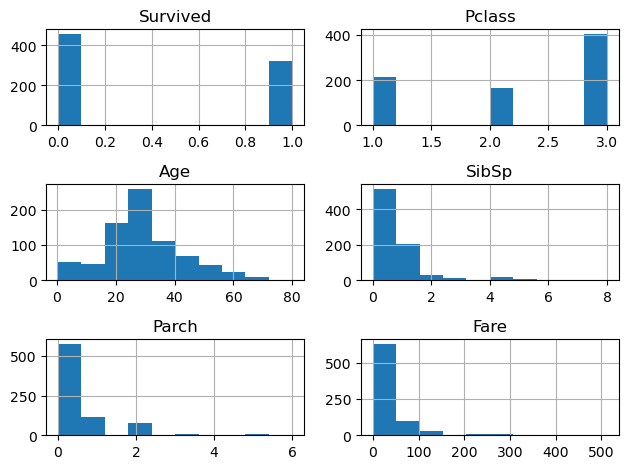

In [40]:
# Traning Dataset
df_train.hist()
plt.tight_layout()

<Axes: >

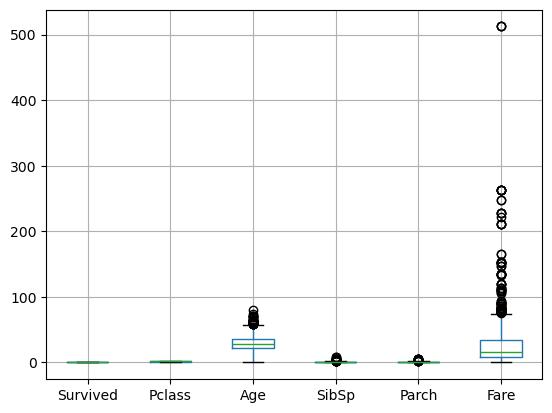

In [41]:
df_train.boxplot()

In [ ]:
# Testing Dataset

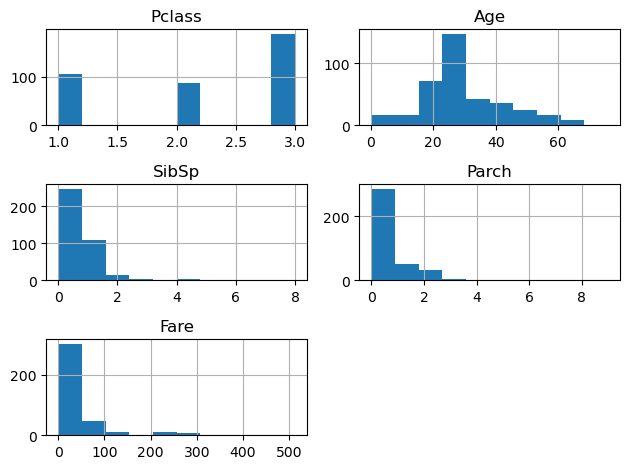

In [42]:
df_test.hist()
plt.tight_layout()

<Axes: >

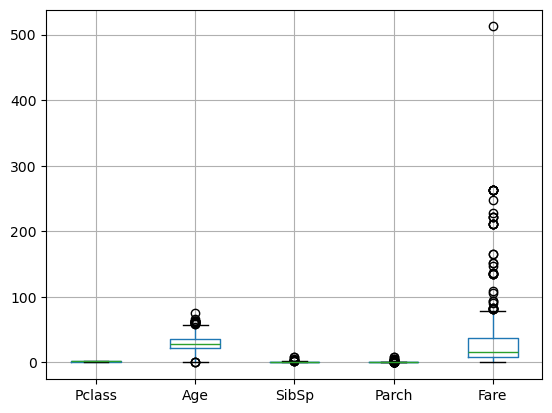

In [43]:
df_test.boxplot()

In [ ]:
# Visualize relationships between features 

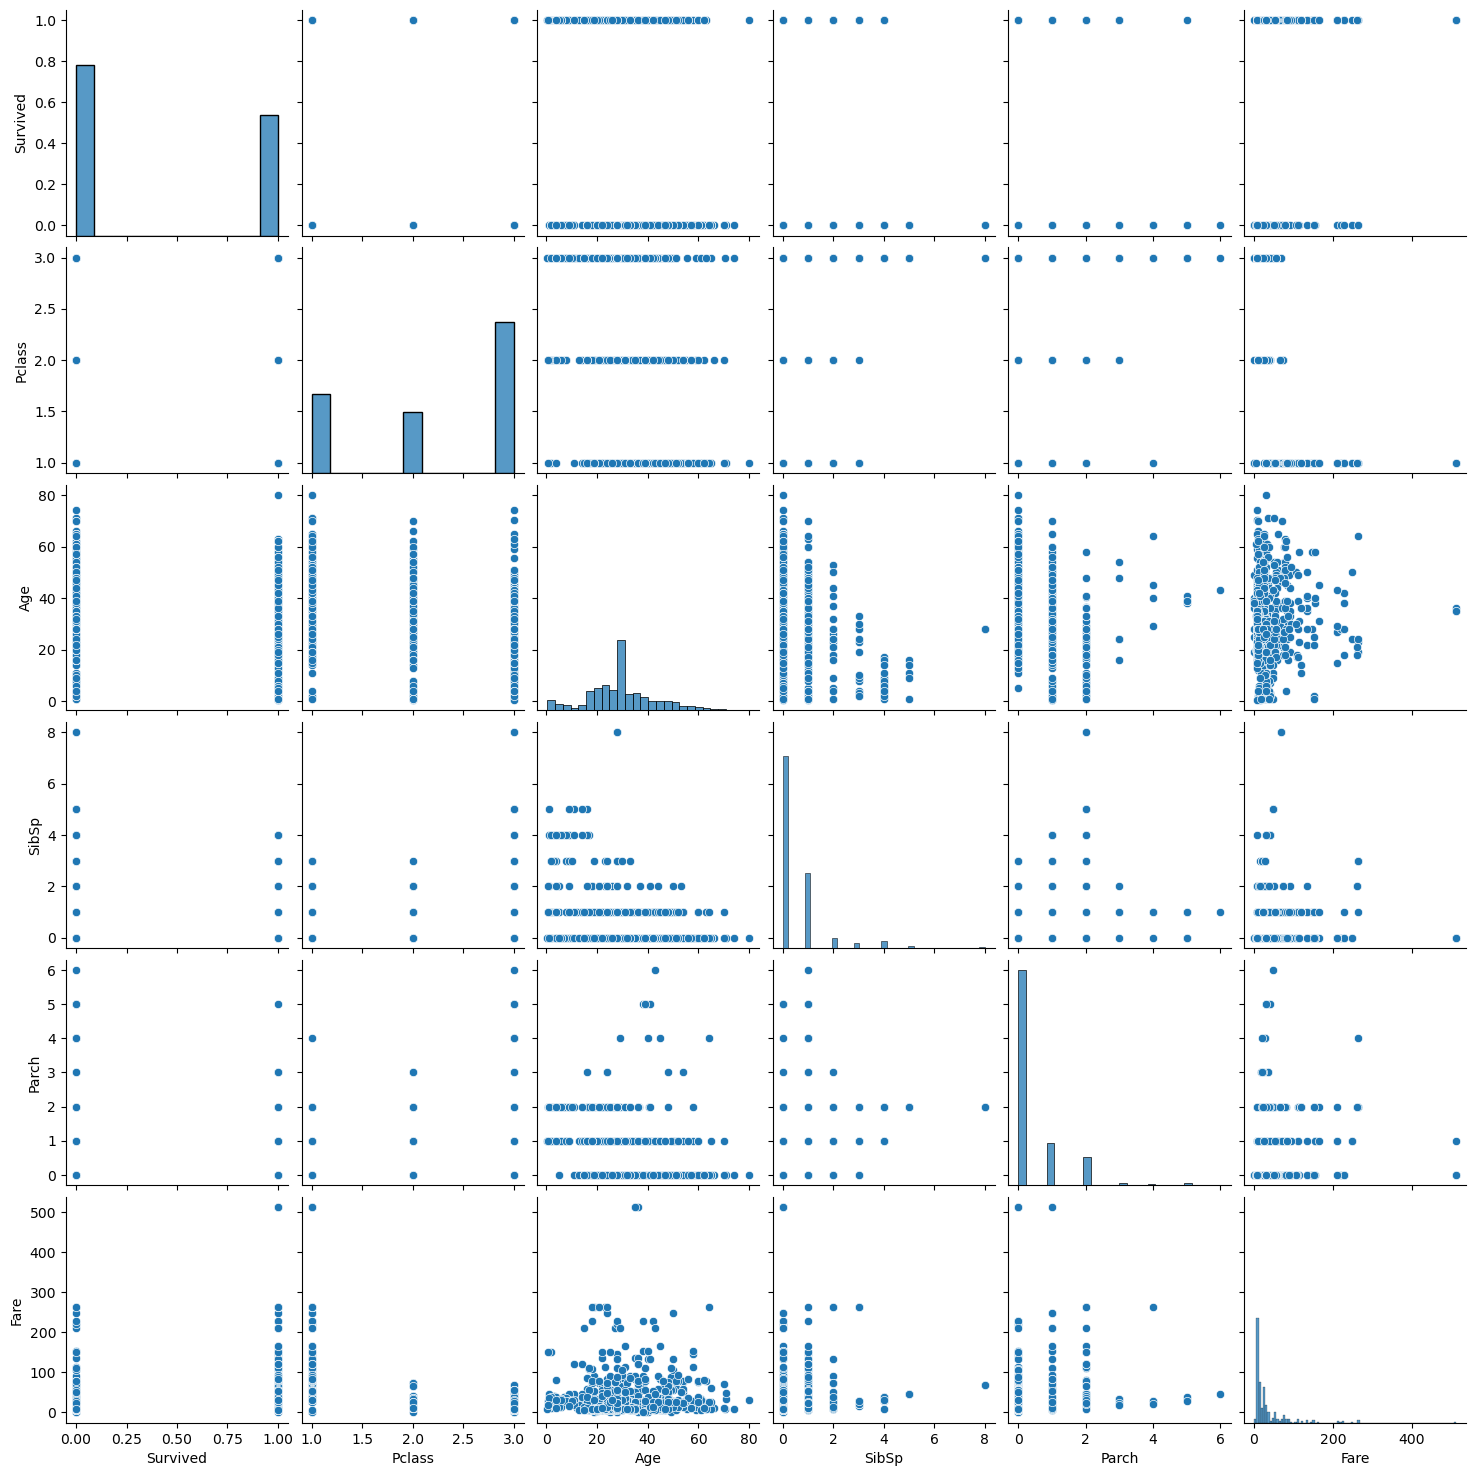

In [44]:
# Traning Datasets
sns.pairplot(df_train)

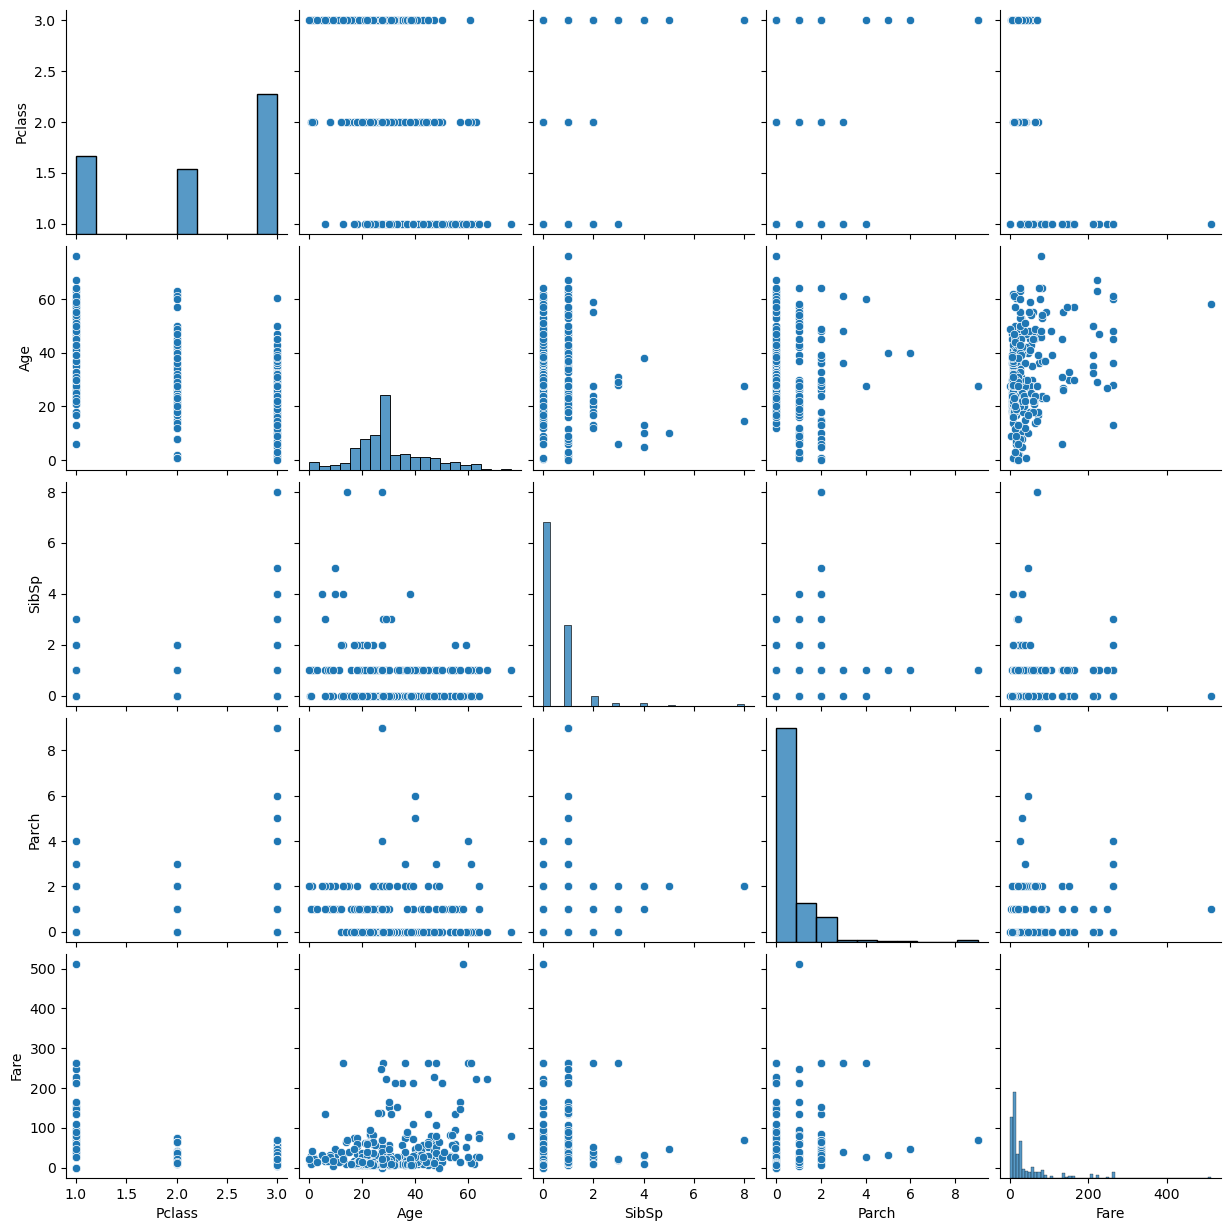

In [45]:
# Testing Datasets
sns.pairplot(df_test)

### Data Preprocessing:

In [ ]:
# Encoding Categorical Variables: use one-hot encoding for the Sex and Embarked variable

In [38]:
#One-hot encoding the sex and embarked variable in training datasets
df_train=pd.get_dummies(data=df_train, columns=['Sex','Embarked'],drop_first=True).astype(int)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39,0,5,29,0,1,0
887,1,1,19,0,0,30,0,0,1
888,0,3,28,1,2,23,0,0,1
889,1,1,26,0,0,30,1,0,0


In [39]:
#One-hot encoding the sex and embarked variable in testing datasets
df_test=pd.get_dummies(data=df_test, columns=['Sex','Embarked'],drop_first=True).astype(int)
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34,0,0,7,1,1,0
1,3,47,1,0,7,0,0,1
2,2,62,0,0,9,1,1,0
3,3,27,0,0,8,1,0,1
4,3,22,1,1,12,0,0,1
...,...,...,...,...,...,...,...,...
411,1,37,1,0,90,0,1,0
412,3,28,0,0,7,0,0,1
414,1,39,0,0,108,0,0,0
415,3,38,0,0,7,1,0,1


In [ ]:
# Scaling the Data 

In [ ]:
#traning data

In [40]:
ytrain=df_train['Survived']
ytrain

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 780, dtype: int32

In [41]:
df_train.drop(columns=['Survived'],inplace=True)

In [42]:
df_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22,1,0,7,1,0,1
1,1,38,1,0,71,0,0,0
2,3,26,0,0,7,0,0,1
3,1,35,1,0,53,0,0,1
4,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39,0,5,29,0,1,0
887,1,19,0,0,30,0,0,1
888,3,28,1,2,23,0,0,1
889,1,26,0,0,30,1,0,0


In [43]:
sc=StandardScaler()

In [44]:
xtrain=sc.fit_transform(df_train)
xtrain

array([[ 0.88282317, -0.55051791,  0.48040606, ...,  0.77353775,
        -0.28342973,  0.61291221],
       [-1.45936076,  0.61554854,  0.48040606, ..., -1.29276172,
        -0.28342973, -1.63155503],
       [ 0.88282317, -0.2590013 , -0.53234185, ..., -1.29276172,
        -0.28342973,  0.61291221],
       ...,
       [ 0.88282317, -0.11324299,  0.48040606, ..., -1.29276172,
        -0.28342973,  0.61291221],
       [-1.45936076, -0.2590013 , -0.53234185, ...,  0.77353775,
        -0.28342973, -1.63155503],
       [ 0.88282317,  0.17827362, -0.53234185, ...,  0.77353775,
         3.52821143, -1.63155503]])

In [ ]:
# testing data

In [45]:
xtest=sc.fit_transform(df_test)
xtest

array([[ 0.91896749,  0.31702704, -0.52365789, ...,  0.78113347,
         3.24270744, -1.38675049],
       [ 0.91896749,  1.29584802,  0.55780949, ..., -1.28019096,
        -0.30838428,  0.72111026],
       [-0.25681583,  2.42525684, -0.52365789, ...,  0.78113347,
         3.24270744, -1.38675049],
       ...,
       [-1.43259915,  0.69349665, -0.52365789, ..., -1.28019096,
        -0.30838428, -1.38675049],
       [ 0.91896749,  0.61820272, -0.52365789, ...,  0.78113347,
        -0.30838428,  0.72111026],
       [ 0.91896749, -0.21003041,  0.55780949, ...,  0.78113347,
        -0.30838428, -1.38675049]])

### Building Predictive Models

In [ ]:
#Build predictive models using LightGBM and XGBoost algorithms

In [46]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain,ytrain)}")
    print(classification_report(yp,yp))

In [47]:
prediction(XGBClassifier())

Train Accuracy: 0.9423076923076923
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00       149

    accuracy                           1.00       380
   macro avg       1.00      1.00      1.00       380
weighted avg       1.00      1.00      1.00       380



In [48]:
prediction(LGBMClassifier())

[LightGBM] [Info] Number of positive: 322, number of negative: 458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 780, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412821 -> initscore=-0.352318
[LightGBM] [Info] Start training from score -0.352318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Hyperparameter Tuning: 

In [49]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Example for XGBoost hyperparameter tuning

In [50]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

In [51]:
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
print("Best parameters for XGBoost:", grid_search.best_params_)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
